In [1]:
from imports import *

In [2]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wassociations.fits' %root_dir)

mask_hii = table['HII_class_v3_MUSE']==1
table = table[mask_hii]

mask = ~table['no_associations_association_nuv_32pc']
table = table[mask]

table['gal_name', 'region_ID', 'region_ID_association_nuv_32pc', 'age_association_nuv_32pc', 'mass_association_nuv_32pc']

gal_name,region_ID,region_ID_association_nuv_32pc,age_association_nuv_32pc,mass_association_nuv_32pc
bytes32,float64,float64,float64,float64
IC5332,10.0,341.0,4.0,1726.7728454843584
IC5332,17.0,500.0,2.0,4139.695819420994
IC5332,18.0,493.0,10.0,1353.906565077747
IC5332,21.0,491.0,8.0,1141.5279077297132
IC5332,26.0,171.0,1.0,11481.69079464005
IC5332,29.0,458.0,2.0,1349.3038103133133
IC5332,31.0,528.0,2.0,4279.84410449229
IC5332,38.0,123.0,1.0,2302.3488655771403
IC5332,41.0,422.0,3.0,723.3941293708432


In [3]:
table_scheuermann2023 = QTable.read('%s/data_misc/Nebulae_catalogue_Scheuermann2023/matched_catalogue.fits' %root_dir)
table_scheuermann2023['gal_name', 'region_ID', 'assoc_ID', 'overlap', 'age', 'mass']

gal_name,region_ID,assoc_ID,overlap,age,mass
,,,,Myr,solMass
bytes32,float64,float64,bytes9,float64,float64
IC5332,10.0,333.0,partial,4.0,1435.3653126939819
IC5332,17.0,489.0,partial,2.0,5536.226205370396
IC5332,18.0,482.0,contained,10.0,1148.5989644814774
IC5332,20.0,84.0,contained,9.0,290.8323218483155
IC5332,21.0,480.0,partial,8.0,982.4004588250333
IC5332,26.0,167.0,contained,9.0,3196.1455488330107
IC5332,27.0,217.0,partial,9.0,129.9036357739362
IC5332,29.0,450.0,contained,2.0,1117.6037995206607


In [4]:
n_tot = 0
n_tot_scheuermann2023 = 0

gal_names = np.unique(table['gal_name'])
for gal_name in gal_names: 

    mask1 = table['gal_name'] == gal_name
    mask2 = table_scheuermann2023['gal_name'] == gal_name

    table_masked = table[mask1]
    table_scheuermann2023_masked = table_scheuermann2023[mask2]

    n = 0
    for region_ID in table_scheuermann2023_masked['region_ID']:
        mask = table_masked['region_ID'] == region_ID
        if np.sum(mask) > 0:
            n += 1

    n_tot += n
    n_tot_scheuermann2023 += len(table_scheuermann2023_masked)
                                 
    print('%s: %i %i' %(str(gal_name), n, len(table_scheuermann2023_masked)))

print('Total: %i %i' %(n_tot, n_tot_scheuermann2023))

IC5332: 39 135
NGC0628: 131 379
NGC1087: 116 181
NGC1300: 125 179
NGC1365: 39 90
NGC1385: 76 131
NGC1433: 32 223
NGC1512: 47 197
NGC1566: 147 297
NGC1672: 145 237
NGC2835: 38 192
NGC3351: 74 249
NGC3627: 71 183
NGC4254: 244 390
NGC4303: 215 342
NGC4321: 113 332
NGC5068: 57 174
NGC7496: 46 91
Total: 1755 4002


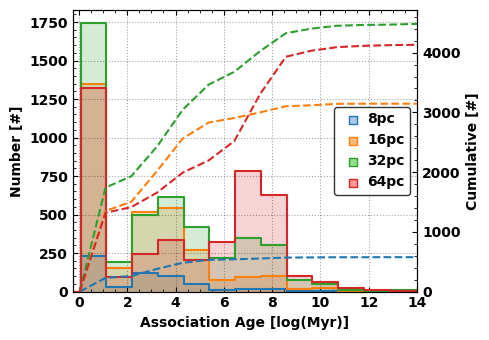

In [5]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = table['age_association_nuv_08pc'].value
data2 = table['age_association_nuv_16pc'].value
data3 = table['age_association_nuv_32pc'].value
data4 = table['age_association_nuv_64pc'].value

bins = np.linspace(-1, 15, 16)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 3.5)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(-0.25, 14)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Age [log(Myr)]')
ax.set_ylabel('Number [#]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#]')

ax2.legend(loc='center right', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_nuv_agelog_all.pdf', dpi=250, bbox_inches='tight')

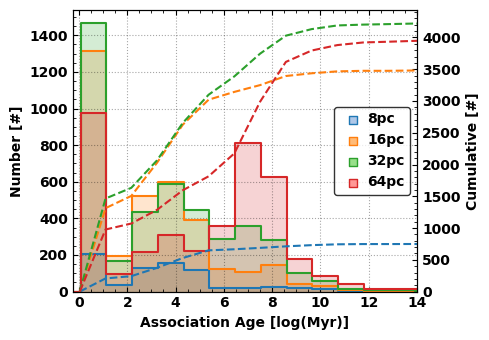

In [6]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = table['age_association_v_08pc'].value
data2 = table['age_association_v_16pc'].value
data3 = table['age_association_v_32pc'].value
data4 = table['age_association_v_64pc'].value

bins = np.linspace(-1, 15, 16)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 3.5)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(-0.25, 14)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Age [log(Myr)]')
ax.set_ylabel('Number [#]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#]')

ax2.legend(loc='center right', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_v_agelog_all.pdf', dpi=250, bbox_inches='tight')

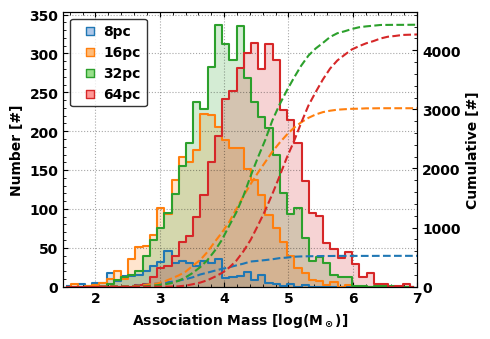

In [7]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = np.log10(table['mass_association_nuv_08pc'].value)
data2 = np.log10(table['mass_association_nuv_16pc'].value)
data3 = np.log10(table['mass_association_nuv_32pc'].value)
data4 = np.log10(table['mass_association_nuv_64pc'].value)

bins = np.linspace(1.5, 7, 50)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 3.5)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(1.5, 7)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Mass [log(M$_\odot$)]')
ax.set_ylabel('Number [#]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#]')

ax2.legend(loc='upper left', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_nuv_masslog_all.pdf', dpi=250, bbox_inches='tight')

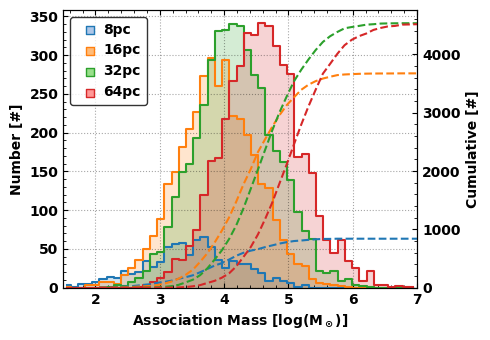

In [8]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data1 = np.log10(table['mass_association_v_08pc'].value)
data2 = np.log10(table['mass_association_v_16pc'].value)
data3 = np.log10(table['mass_association_v_32pc'].value)
data4 = np.log10(table['mass_association_v_64pc'].value)

bins = np.linspace(1.5, 7, 50)

bins1, bins_cent1, hist1 = get_hist(data1, bins=bins, norm=False)
bins2, bins_cent2, hist2 = get_hist(data2, bins=bins, norm=False)
bins3, bins_cent3, hist3 = get_hist(data3, bins=bins, norm=False)
bins4, bins_cent4, hist4 = get_hist(data4, bins=bins, norm=False)

fig = plt.figure(figsize=(5, 3.5)) 

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(bins_cent1, hist1, ds='steps-mid', c='C0')
ax.fill_between(bins_cent1, hist1, alpha=0.2, step='mid', fc='C0')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[0], fc=colors2[0], label='8pc')

ax.plot(bins_cent2, hist2, ds='steps-mid', c='C1')
ax.fill_between(bins_cent2, hist2, alpha=0.2, step='mid', fc='C1')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[1], fc=colors2[1], label='16pc')

ax.plot(bins_cent3, hist3, ds='steps-mid', c='C2')
ax.fill_between(bins_cent3, hist3, alpha=0.2, step='mid', fc='C2')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[2], fc=colors2[2], label='32pc')

ax.plot(bins_cent4, hist4, ds='steps-mid', c='C3')
ax.fill_between(bins_cent4, hist4, alpha=0.2, step='mid', fc='C3')
ax2.scatter(np.nan, np.nan, marker='s', ec=colors1[3], fc=colors2[3], label='64pc')

ylim = ax.get_ylim()
ax.set_ylim(0, ylim[-1])
ax.set_xlim(1.5, 7)

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_xlabel('Association Mass [log(M$_\odot$)]')
ax.set_ylabel('Number [#]')

running_sum = np.cumsum(hist1)
ax2.plot(bins_cent1+0.5, running_sum, ls='--', c='C0')
running_sum = np.cumsum(hist2)
ax2.plot(bins_cent2+0.5, running_sum, ls='--', c='C1')
running_sum = np.cumsum(hist3)
ax2.plot(bins_cent3+0.5, running_sum, ls='--', c='C2')
running_sum = np.cumsum(hist4)
ax2.plot(bins_cent4+0.5, running_sum, ls='--', c='C3')

ylim = ax2.get_ylim()
ax2.set_ylim(0, ylim[-1])
ax2.set_ylabel('Cumulative [#]')

ax2.legend(loc='upper left', edgecolor='black', handletextpad=0)

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/hist_associations_v_masslog_all.pdf', dpi=250, bbox_inches='tight')